In [2]:
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# MIT MIMIC-III Clinical Database Demo 

Link: https://physionet.org/content/mimiciii-demo/1.4/
        
## Admissions.csv

 Time of day, day of the week, and approximate seasonality were conserved during date shifting

In [6]:
adm_data = pd.read_csv('data/admissions.csv')

In [16]:
adm_orig = adm_data.copy()

In [7]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
row_id                  129 non-null int64
subject_id              129 non-null int64
hadm_id                 129 non-null int64
admittime               129 non-null object
dischtime               129 non-null object
deathtime               40 non-null object
admission_type          129 non-null object
admission_location      129 non-null object
discharge_location      129 non-null object
insurance               129 non-null object
language                81 non-null object
religion                128 non-null object
marital_status          113 non-null object
ethnicity               129 non-null object
edregtime               92 non-null object
edouttime               92 non-null object
diagnosis               129 non-null object
hospital_expire_flag    129 non-null int64
has_chartevents_data    129 non-null int64
dtypes: int64(5), object(14)
memory usage: 19.3+ KB


In [8]:
adm_data.describe()

,row_id,subject_id,hadm_id,hospital_expire_flag,has_chartevents_data
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078,0.992248
std,14036.548988,16048.502883,27858.788248,0.464328,0.088045
min,12258.000000,10006.000000,100375.000000,0.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000,1.000000
50%,39869.000000,40310.000000,157235.000000,0.000000,1.000000
75%,40463.000000,42135.000000,174739.000000,1.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000,1.000000


In [10]:
adm_data.tail()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1
128,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2170-12-15 02:22:00,2170-12-15 05:25:00,CHOLANGITIS,0,1


In [22]:
adm_data.admittime = pd.to_datetime(adm_data.admittime, format = '%Y-%m-%d %H:%M:%S')
adm_data.dischtime = pd.to_datetime(adm_data.	dischtime, format = '%Y-%m-%d %H:%M:%S')

In [26]:
adm_data['los'] = (adm_data.dischtime - adm_data.admittime)

In [64]:
adm_data.tail()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,los,los_min
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1,10 days 01:05:00,14465.0
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1,0 days 13:16:00,796.0
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,...,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1,36 days 00:17:00,51857.0
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1,1 days 06:05:00,1805.0
128,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,NOT SPECIFIED,SINGLE,WHITE,2170-12-15 02:22:00,2170-12-15 05:25:00,CHOLANGITIS,0,1,9 days 14:46:00,13846.0


In [48]:
adm_data['los_min'] = adm_data.los.dt.total_seconds()/60

In [57]:
removed_top = adm_data.los_min.sort_values(ascending=False)[1:]

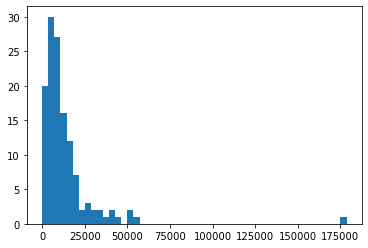

In [52]:
plt.hist(adm_data.los_min, bins=50);

In [61]:
removed_top.describe()

count      128.000000
mean     12148.718750
std      11039.271087
min         55.000000
25%       4657.000000
50%       9389.500000
75%      14790.500000
max      57164.000000
Name: los_min, dtype: float64

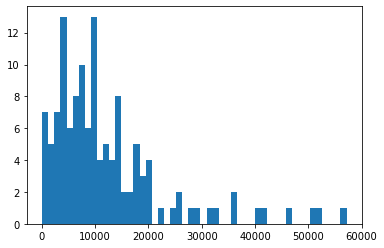

In [60]:
plt.hist(removed_top, bins=50);

In [62]:
adm_data.subject_id.value_counts().sort_values(ascending=False)

41976    15
44083     3
10088     3
10119     2
10059     2
         ..
42275     1
43746     1
43748     1
43798     1
10035     1
Name: subject_id, Length: 100, dtype: int64

In [65]:
caregiver = pd.read_csv('data/caregivers.csv')

In [66]:
both = caregiver.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 4 columns):
row_id         7567 non-null int64
cgid           7567 non-null int64
label          7518 non-null object
description    5155 non-null object
dtypes: int64(2), object(2)
memory usage: 236.6+ KB
